**Data Analysis Project : Bike Sharing Dataset**

- Name : Fanisha Heavi Indria
- Email : fanishaheavi@students.unnes.ac.id
- ID Dicoding : fanishaheavi

**Defining the Business Question**

- Question 1 : How does the weather affect the number of bike rentals?
- Question 2 : How does bike rentals differ between weekdays and holidays at various hours of the day?

**Import All Packages/Libraries Used**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- **numpy**: A library in Python used for numerical computing, providing support for arrays, matrices, and mathematical functions.
- **pandas**: A library in Python used for data manipulation and analysis, providing data structures like DataFrame that are efficient for handling structured data.
- **matplotlib.pyplot**: A plotting library in Python used for creating static, interactive, and animated visualizations in Python.
- **seaborn**: A data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

**Data Wrangling**

**Gathering Data**

- Load Day Table

  The first data that must be loaded is data from the day table. Here is the code to load the table into a DataFrame.

In [3]:
Day_data = pd.read_csv('day.csv')
Day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


  The code above will display the first 5 rows of the DataFrame Day_data as shown in the image above.

- Load Hour Table

  The next data we have to load is the data from the hour table. This can be done by running the following code.

In [4]:
Hour_data = pd.read_csv('hour.csv')
Hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


  Besides loading the day table into a DataFrame, the code above will also display the first 5 rows of the Dataframe.

**Assessing Data**

- Assess Day_data Data

  The first data we will assess is Day_data. To start with, check the data type of each column in Day_data. This process can be done using the info() method like the following code example.

In [5]:
Day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


  The code above will display information like this image above.

  If you notice, there is no problem with the data types of all the columns. Because the amount of data in each column is the same. This indicates that there are no missing values in all columns. However, there is a data type error for the dteday column. The column should be represented as datetime data type, not object (it is used for string data type). 

  Now, to confirm this, run the following code.

In [6]:
Day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

  The code above will display information regarding the number of missing values contained in each column as shown above. Well, the image above shows that there are no missing values in all columns. 

  The next problem we should check for is data duplication. To check this, we can run the following code.

In [7]:
print("Number of duplicates: ", Day_data.duplicated().sum())

Number of duplicates:  0


  When running the code above, you will find that there is no duplicate data. 

  Now we check the statistical parameters of the numeric columns contained in Day_data. To make the inspection easier, use the describe() method. It will display a summary of the statistical parameters (mean, median, etc.) of a numeric column in a DataFrame. Here is how it is used.

In [8]:
Day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Assess Hour_data Data

  Next we will assess the data in Hour_data. As usual, start by checking the data type of each column using the info() method.

In [9]:
Hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


  If you notice, there is no problem with the data types of all the columns. Because the amount of data in each column is the same. This indicates that there are no missing values in all columns. However, there is a data type error for the dteday column. The column should be represented as datetime data type, not object (it is used for string data type). This is the same as what happened with Day_data.

  Next, we need to check the duplication and summary statistical parameters of the numeric column in Hour_data. This process is done by running the following code.

In [10]:
print("Number of duplicates: ",Hour_data.duplicated().sum())
Hour_data.describe()

Number of duplicates:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Cleaning Data**

- Cleaning Data Day_data

  Based on the results of the data assessment process, it is known that there is one problem found in Day_data, which is a data type error for the dteday column. In this step, we will clean up the problem.

  To solve this problem, we will change the data type of the dteday column to datetime. This process can be done using the to_datetime() function provided by the pandas library. Here is the code to do it.

In [11]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  Day_data[column] = pd.to_datetime(Day_data[column])

  The code above will change the data type in the dteday column to datetime. To make sure this works as expected, check the data type again using the info() method.

In [12]:
Day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Cleaning Data Hour_data

  Based on the results of the data assessment process, it is known that there is one problem found in Hour_data, which is a data type error for the dteday column. In this step, we will clean up the problem.

  To solve this problem, we will change the data type of the dteday column to datetime. This process can be done using the to_datetime() function provided by the pandas library. Here is the code to do it.

In [13]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  Hour_data[column] = pd.to_datetime(Hour_data[column])

  The code above will change the data type in the dteday column to datetime. To make sure this works as expected, check the data type again using the info() method.

In [14]:
Hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Exploratory Data Analysis (EDA)**

  As we know, this dataset contains various information related to instan (record index), season, yr (year), mnth (month), hr (hour), holiday, weekday, workingday, weathersit, temp (normalized temperature in celsius), atemp (normalized feeling temperature in celsius), hum (normalized humidity), windspeed, casual (count of casual users), registered (count of registered users), cnt (count of total rental bikes including both casual and registered). 

  To get more information about the two data, we need to combine them through a join or merge process. Here is the code to merge the Day_data and Hour_data data.

In [15]:
bike_data = pd.merge(
    left=Hour_data,
    right=Day_data,
    how="left",
    left_on="dteday",
    right_on="dteday",
    suffixes=('_hour','_day')
)
bike_data.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


  In the code above, we perform the merge process with the "left" method. This method allows us to retrieve all the values from the left table as well as the corresponding values from the right table. Here is the data display from the code above. There is a lot of information that we can explore from the data above.

  Now let's look at the bike rentals rates by season. First create a new column called 'season_label' in the 'Bike_data' DataFrame.

In [16]:
season_labels = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

bike_data['season_label'] = bike_data['season_day'].map(season_labels)

  The display of the DataFrame with the new column season_labels added is as follows.

In [17]:
bike_data.columns

Index(['instant_hour', 'dteday', 'season_hour', 'yr_hour', 'mnth_hour', 'hr',
       'holiday_hour', 'weekday_hour', 'workingday_hour', 'weathersit_hour',
       'temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour', 'casual_hour',
       'registered_hour', 'cnt_hour', 'instant_day', 'season_day', 'yr_day',
       'mnth_day', 'holiday_day', 'weekday_day', 'workingday_day',
       'weathersit_day', 'temp_day', 'atemp_day', 'hum_day', 'windspeed_day',
       'casual_day', 'registered_day', 'cnt_day', 'season_label'],
      dtype='object')

In [18]:
bike_data.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,season_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4496
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


  Now calculate the average number of bike loans cnt_day for each season contained in the Bike_data DataFrame. 

In [19]:
bike_data.groupby('season_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,season_label,cnt_day
1,Springer,2635.348185
3,Winter,4765.366021
2,Summer,4995.253119
0,Fall,5654.093194


  Now let's look at the bike rentals rates by workingday_hour. The goal is to calculate the average number of bike loans (cnt_hour) at each hour of the day (hr), based on whether the day is a working day or not (workingday_hour).

In [20]:
bike_data.groupby(['hr','workingday_hour'])['cnt_hour'].mean().reset_index().sort_values("hr")

,hr,workingday_hour,cnt_hour
0,0,0,90.800000
1,0,1,36.786290
2,1,0,69.508696
3,1,1,16.552632
4,2,0,53.171053
5,2,1,8.683778
6,3,0,25.775330
7,3,1,4.942553
8,4,0,8.264317
9,4,1,5.429787


**Visualization & Explanatory Analysis**

  Question 1 : How does the weather affect the number of bike rentals?

C:\Users\USE\AppData\Local\Temp\ipykernel_1612\2292686287.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cnt_day', y='season_label', data=avg_season, palette='summer')


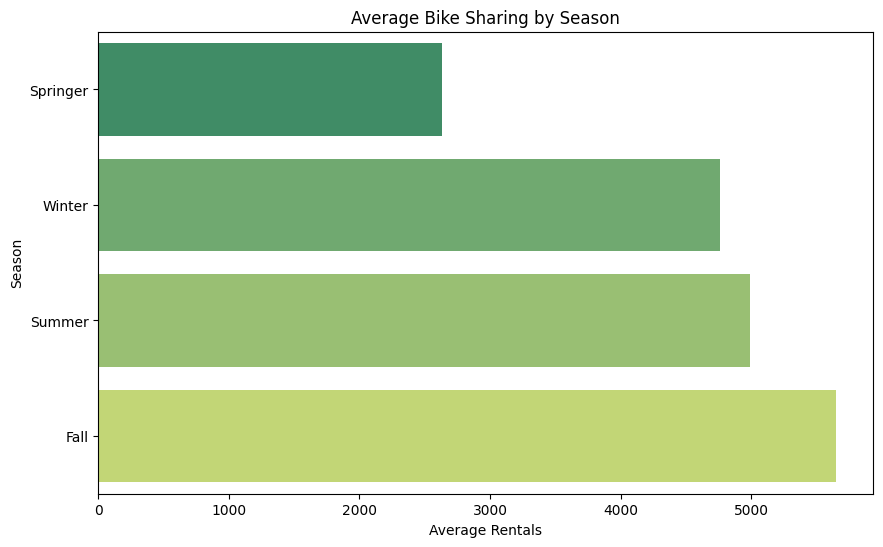

In [21]:
avg_season = Bike_data.groupby('season_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(10, 6))

sns.barplot(x='cnt_day', y='season_label', data=avg_season, palette='summer')
plt.title('Average Bike Sharing by Season')
plt.xlabel('Average Rentals')
plt.ylabel('Season')

plt.show()

Question 2 : How does bike rentals differ between weekdays and holidays at various hours of the day?

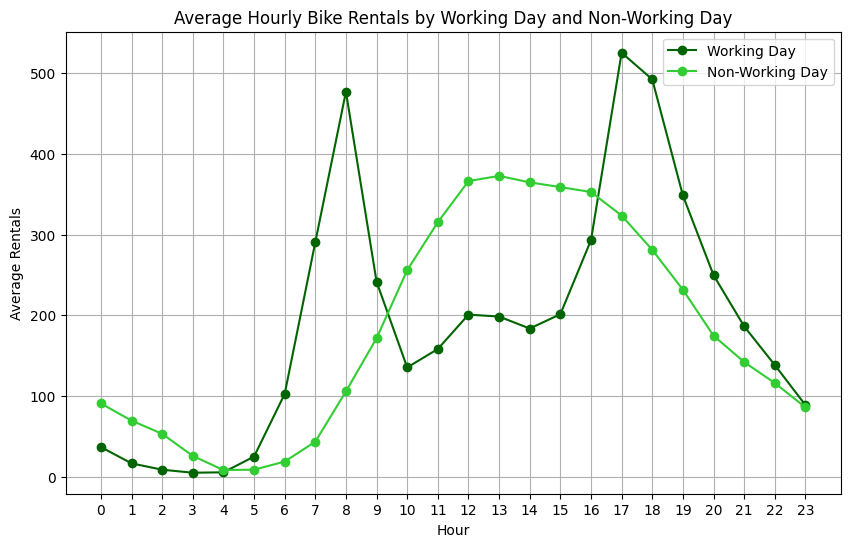

In [22]:
avg_hourly_rentals = Bike_data.groupby(['hr', 'workingday_hour'])['cnt_hour'].mean().reset_index().sort_values("hr")

working_day_data = avg_hourly_rentals[avg_hourly_rentals['workingday_hour'] == 1]
non_working_day_data = avg_hourly_rentals[avg_hourly_rentals['workingday_hour'] == 0]

plt.figure(figsize=(10, 6))
plt.plot(working_day_data['hr'], working_day_data['cnt_hour'], label='Working Day', marker='o',color='darkgreen')
plt.plot(non_working_day_data['hr'], non_working_day_data['cnt_hour'], label='Non-Working Day', marker='o',color='limegreen')

plt.title('Average Hourly Bike Rentals by Working Day and Non-Working Day')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


**Conclusion**

- Conclution Question 1 : Bike rentals is high in the fall and summer.

  1. Highest rentals season: Bike rentals is highest in the Fall, with an average of about 5654 borrowings per day. This is followed by Summer with an average of about 4995 loans per day, then Winter with about 4765 loans per day, and Spring with the lowest number of loans at about 2635 loans per day.

  2. Weather influence: Warmer seasons (Fall and Summer) have a higher number of bike rentals compared to Winter and Springer. This may be due to more pleasant weather conditions and more opportunities for outdoor activities.

  3. Lending trends: Bike rentals trends show that lending demand tends to increase over time from spring to fall. Then, there is a significant drop during winter before increasing again the following spring. This corresponds to the pattern of outdoor activity, which is usually higher in the warm season and decreases during the winter.

- Conclution Question 2 : Bike rentals patterns are influenced by the day of the week and the time of day. On weekdays, bike rentals tends to be high in the hours before and after work, while on holidays, rentals peaks are more common around noon.

  1. Influence of hours on bike rentals on weekdays and holidays :
     - On weekdays, bike rentals tends to be high during peak hours such as the morning before work starts (7-9) and the afternoon after work ends (16-18).
     - Outside of these peak hours, there is a significant drop in bike rentals, which may be related to breaks or lunch hours.
     - On holidays, the pattern of bike rentals tends to be different, with peak rentals occurring around noon (12-15). This may be due to daytime recreational or sports activities during the weekend.

  2. Comparison of the number of bike rentals between weekdays and holidays:
     - On weekdays, the number of bike rentals tends to be higher than on holidays during the peak hours before and after work.
     - However, during some hours during the day, the number of bike loans is higher on holidays compared to weekdays, indicating that bike are often used for recreational activities during holidays.